# **End-to-end Solution for Credit Risk Scorecard Model**

**Dataset**: Lending company loan data issued from 2007 until 2014

**Objectives**:

*   Develop a data-driven credit risk model in Python to predict the probabilities of default
*   Assign credit scores to existing or potential borrowers

**Data Resources and References**:

*   Credit Loan Dataset 2007-2014 (format .csv) https://drive.google.com/file/d/1WYE_xYsOaVuPr4GxijTT0pmjKjxSRtm3/view?usp=drive_link
*   Credit Loan Dataset Dictionary (sheet: LoanStats) https://docs.google.com/spreadsheets/d/1iT1JNOBwU4l616_rnJpo0iny7blZvNBs/edit#gid=1001272030
*   How to Develop a Credit Risk Scorecard https://towardsdatascience.com/how-to-develop-a-credit-risk-model-and-scorecard-91335fc01f03



# IMPORT LIBRARIES

In [2]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# IMPORT DATA

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_raw = pd.read_csv('/content/drive/MyDrive/Portfolio/Project-Based Intern: Data Scientist Virtual Internship Experience - ID X Partners/loan_data_2007_2014.csv', index_col=0)

<ipython-input-5-0a8ef1914eea>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('/content/drive/MyDrive/Portfolio/Project-Based Intern: Data Scientist Virtual Internship Experience - ID X Partners/loan_data_2007_2014.csv', index_col=0)


# EXPLORE DATA

In [6]:
data_raw.shape

(466285, 74)

In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [8]:
data_raw.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
456394,10714610,12606761,10000,10000,10000.0,60 months,16.24,244.46,C,C5,Manager,6 years,MORTGAGE,38000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,661xx,KS,15.35,0.0,May-09,0.0,NaN,NaN,7.0,0.0,4005,65.7,10.0,f,0.0,0.0,4707.45,4707.45,1539.73,1638.2,0.0,1529.52,275.3136,Feb-15,244.46,NaN,Jul-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,13076.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6100.0,NaN,NaN,NaN


In [9]:
data_raw.id.nunique()

466285

In [10]:
data_raw.member_id.nunique()

466285

It can be seen that there are no duplicate `id` or `member_id`, it means that each row represents one individual.

After that, removal of useless features is carried out. The examples include features that are unique IDs, in the form of free text, all values are empty (NULL), etc.

In [11]:
cols_to_drop = [
    # unique id
    'id'
    , 'member_id'

    # free text
    , 'url'
    , 'desc'

    # all null / constant / others
    , 'zip_code'
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'

    # expert judgement
    , 'sub_grade'
]

In [12]:
data = data_raw.drop(cols_to_drop, axis=1)

In [13]:
data.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
374038,18200,18200,18200.00,60 months,14.49,428.12,C,Teacher,10+ years,MORTGAGE,47000.0,Source Verified,Jun-14,Current,n,credit_card,Credit card refinancing,NC,17.95,0.0,Aug-99,2.0,NaN,NaN,12.0,0.0,10901,41.8,34.0,w,13780.13,13780.13,8134.28,8134.28,4419.87,3714.41,0.0,0.0,0.0,Jan-16,428.12,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,2018.0,175732.0,26100.0
458523,10000,10000,10000.00,36 months,11.99,332.10,B,mechanical,5 years,RENT,49000.0,Source Verified,Jan-14,Current,n,debt_consolidation,Debt consolidation,NY,25.69,0.0,Apr-02,0.0,60.0,42.0,9.0,2.0,7103,60.2,20.0,f,4029.67,4029.67,7638.30,7638.30,5970.33,1667.97,0.0,0.0,0.0,Jan-16,332.10,Jan-16,Jan-16,1.0,NaN,1,INDIVIDUAL,0.0,633.0,19731.0,11800.0
29643,8000,8000,4674.14,36 months,7.14,247.53,A,Outback Steakhouse,10+ years,RENT,36996.0,Verified,May-10,Charged Off,n,debt_consolidation,Out of Debt Loan,OH,20.86,0.0,Sep-99,0.0,NaN,NaN,7.0,0.0,6738,63.0,24.0,f,0.00,0.00,494.48,463.54,400.58,93.90,0.0,0.0,0.0,Aug-10,247.53,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
353233,30000,30000,30000.00,60 months,17.57,754.81,D,system engineer,4 years,MORTGAGE,165000.0,Verified,Jul-14,Current,n,debt_consolidation,Debt consolidation,IL,20.90,0.0,May-89,5.0,NaN,NaN,10.0,0.0,33584,94.3,26.0,w,23554.65,23554.65,13586.58,13586.58,6445.35,7141.23,0.0,0.0,0.0,Jan-16,754.81,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,95.0,397765.0,35600.0
231193,12000,12000,12000.00,36 months,15.59,419.46,D,Account Executive,10+ years,MORTGAGE,72000.0,Not Verified,Dec-14,Fully Paid,n,debt_consolidation,Debt consolidation,FL,14.01,1.0,Dec-97,0.0,23.0,NaN,15.0,0.0,35038,75.4,39.0,f,0.00,0.00,13439.68,13439.68,12000.00,1439.68,0.0,0.0,0.0,Oct-15,9680.13,NaN,Nov-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,222611.0,46500.0


# DEFINE TARGET VARIABLE / LABELLING

In project credit risk modeling, the main objective is to make predictions about an individual's ability to make payments on a given loan or credit. Therefore, the target variable used must reflect individual abilities in this regard.

In this dataset, the `loan_status` is a variable that can be used as a target variable because it reflects the performance of each individual in making payments on loans or credit so far.

In [14]:
data.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

It can be seen that the `loan_status` variable has several values: `Current` means current payment; `Charged Off` means the payment is jammed so it is written off; `Late` means late payment; `In Grace Period` means the payment in a grace period; `Fully Paid` means payment in full; `Default` means the payment is stuck.

From these definitions, each individual can be characterized whether they are a `bad loan` (bad debtor) or `good loan` (good debtor).

The definitions of `bad loan` and `good loan` can sometimes differ depending on business needs. In this example, I'm using overdue payments of more than 30 days and worse as the `bad loan` flagging.

In [15]:
bad_status = [
    'Charged Off'
    , 'Default'
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

data['bad_flag'] = np.where(data['loan_status'].isin(bad_status), 1, 0)

In [16]:
data['bad_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

After flagging for `bad loan` or `good loan`, it can be seen that the number of individuals marked as bad loans is far less than `good loan`. This causes this problem to become an imbalanced dataset problem.

Don't forget to remove the default `loan_status` column.

In [17]:
data.drop('loan_status', axis=1, inplace=True)

# DATA CLEANING, PREPROCESSING AND FEATURE ENGINEERING

At this step, some features are cleaned or modified into a format that can be used for modeling.

### emp_length

Modify `emp_length`. Example: 4 years -> 4.

In [18]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [19]:
data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

<ipython-input-19-a93402c6aad3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')


In [20]:
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [21]:
data.drop('emp_length', axis=1, inplace=True)

### term

Modify `term`. Example: 36 months -> 36.

In [22]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [23]:
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)

In [24]:
data.drop('term', axis=1, inplace=True)

### earliest_cr_line

Modify the `earliest_cr_line` from months-years format to calculate how much time has passed since that time. To do this, it is common to use reference date = today. However, because this dataset is a dataset for 2007-2014, it would be more relevant to use a reference date around 2017. In this example, I used 2017-12-01 as the reference date.

In [25]:
data['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

In [26]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [27]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [28]:
data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

It seems that there is a strange value, which is negative.

In [29]:
data[data['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


It turns out that the negative value appears because the Python function incorrectly interprets the year 62 to be 2062, when it should be 1962.

To overcome this, further preprocessing can be done if you want to justify the year 2062 to 1962. However, this time I only changed the negative value to the maximum value of the feature. Since here I know that negative values mean old data (1900s), it still makes sense that I change those values to the largest value.

In [30]:
data.loc[data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [31]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

### issue_d

The applied preprocessing concept is the same as for the `earliest_cr_line` variable.

In [32]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [33]:
data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [34]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

### last_pymnt_d

The concept of preprocessing is the same as that of the `earliest_cr_line` variable.

In [35]:
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [36]:
data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [37]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

### next_pymnt_d

The preprocessing concept used is the same as for the `earliest_cr_line` variable.

In [38]:
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [39]:
data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [40]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

### last_credit_pull_d

The concept of preprocessing is the same as that of the `earliest_cr_line` variable.

In [41]:
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [42]:
data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [43]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# EXPLORATORY DATA ANALYSIS (EDA)

### Correlation Check

<ipython-input-44-8966bf0b663b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

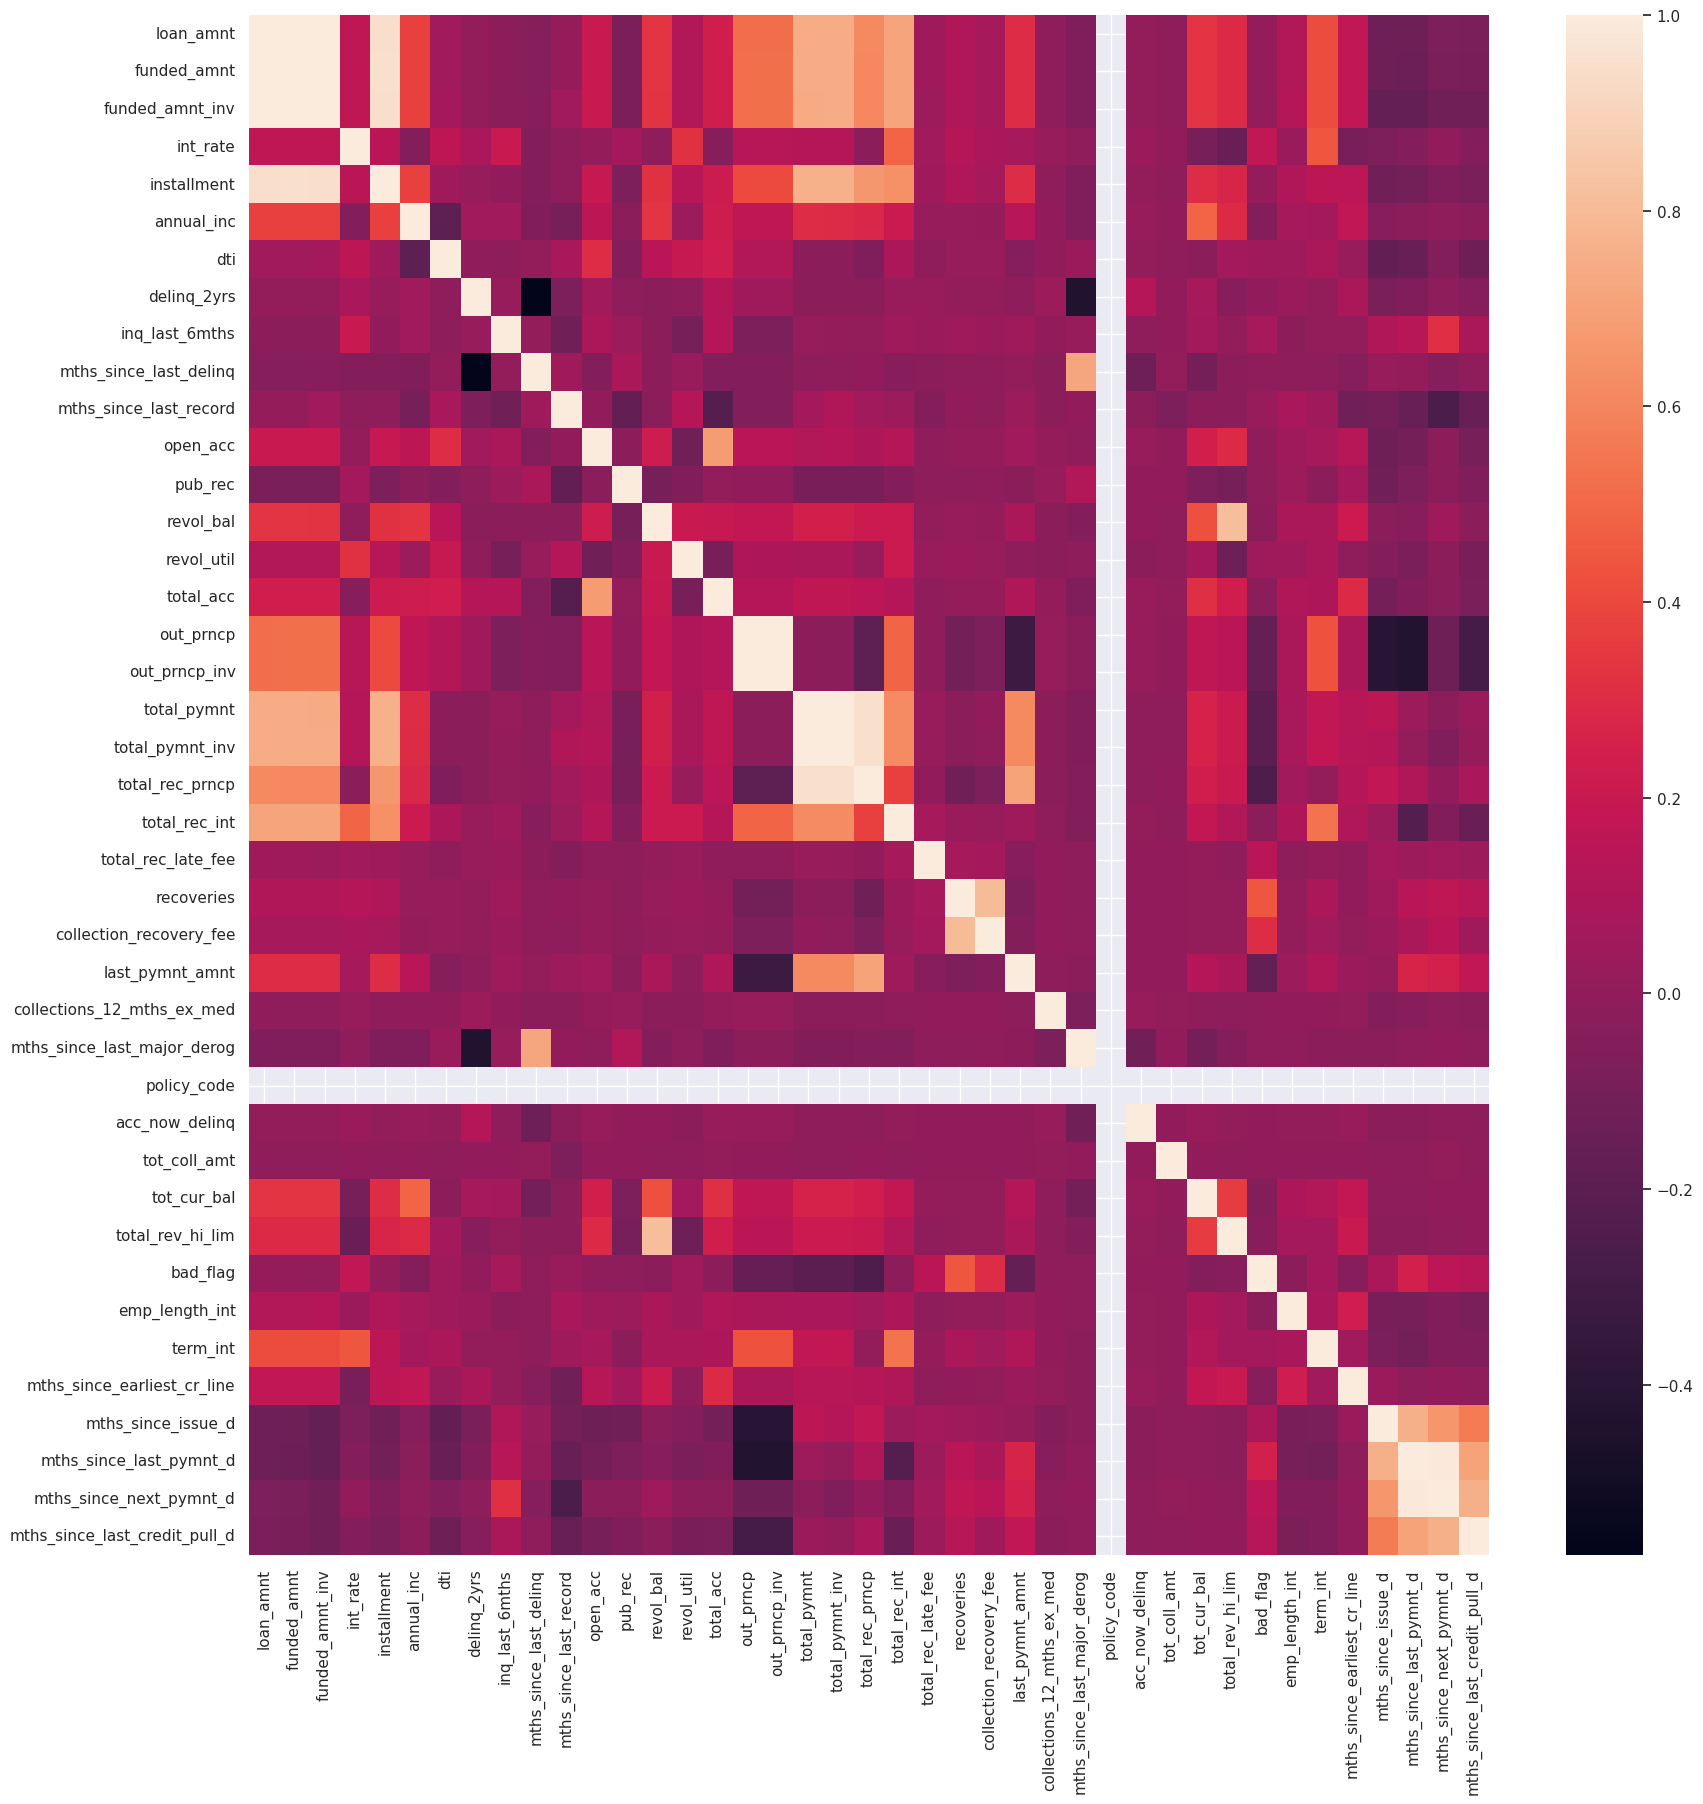

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

Here, if there are pairs of features that have a high correlation, only one will be taken. The correlation value used as a benchmark for high correlation is uncertain, generally the number 0.7 is used.

In [45]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-45-b958f315e56a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr().abs()
<ipython-input-45-b958f315e56a>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [46]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [47]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

### Check Categorical Features

In [48]:
data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

At this stage, features that have a very high unique value (high cardinality) and features that only have one unique value are discarded.

In [49]:
data.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [50]:
data.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
bad_flag                            2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
dtype: int64

In fact, for data types other than `object` there are also features that only have one unique value, so they will also be discarded.

In [51]:
data.drop(['policy_code'], axis=1, inplace=True)

In [52]:
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

Features that are strongly dominated by just one value will be discarded at this stage.

In [53]:
data.drop('pymnt_plan', axis=1, inplace=True)

# MISSING VALUES

### Missing Value Checking

In [54]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

Here, columns with missing values above 75% are discarded.

In [55]:
data.drop('mths_since_last_record', axis=1, inplace=True)

### Missing Values Filling

In [56]:
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

# FEATURE SCALING AND TRANSFORMATION

### One Hot Encoding

All categorical columns are done One Hot Encoding.

In [57]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

In [58]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)

In [59]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Standardization

All numerical columns are standardized using StandardScaler.

In [60]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [61]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [62]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.764941,1.446626
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,-0.212426,1.446626
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,-0.570896,1.446626
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,0.226989,1.446626
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.257509,1.622784,0.238553,1.446626


### Transformed Dataframe

Recombine the transformed columns.

In [63]:
data_model = pd.concat([onehot, std, data[['bad_flag']]], axis=1)

# MODELLING

### Train-Test Split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
X_train.shape, X_test.shape

((373028, 99), (93257, 99))

### Training

In this example the Random Forest algorithm is used for modeling.

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

Feature Importance can be displayed.

In [69]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values

df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
90,recoveries,4.673209e-01
88,out_prncp,1.541789e-01
89,total_rec_late_fee,1.036029e-01
77,int_rate,8.387517e-02
98,mths_since_issue_d,4.140404e-02
4,grade_F,2.288495e-02
3,grade_E,1.927432e-02
2,grade_D,1.492677e-02
96,term_int,1.450003e-02
78,annual_inc,1.198275e-02


### Validation

To measure model performance, two metrics commonly used in the world of credit risk are AUC and KS.

In [70]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

#### AUC

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

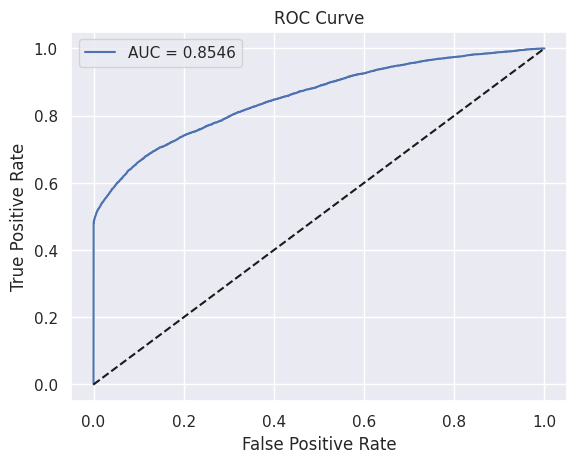

In [72]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### KS

In [73]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [74]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,321938,0,0.048789,1,0,1,0.000011,0.0,0.000012
1,407888,0,0.049432,2,0,2,0.000021,0.0,0.000024
2,318621,0,0.049514,3,0,3,0.000032,0.0,0.000036
3,334474,0,0.049567,4,0,4,0.000043,0.0,0.000048
4,370711,0,0.049655,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5638')

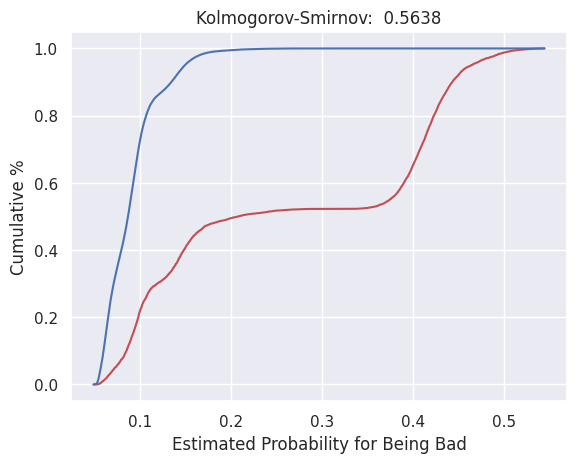

In [75]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

The built model produces a performance of `AUC = 0.857` and `KS = 0.56`. In the world of credit risk modeling, generally AUC above 0.7 and KS above 0.3 is considered as good performance.

# SUGGESTIONS

Some other things that can be done for this project:

- If you want a higher interpretability, you can consider making a Credit Scorecard using the Logistic Regression algorithm with approaches such as Feature Selection using Information Value and Feature Engineering using Weight of Evidence.

- If interpretability is not really needed, you can consider trying other Machine Learning algorithms such as Boosting.

- Performing hyperparameter tuning.

- Check or ensure that the model that has been made is not overfitting. This can be done by trying to compare the results of model performance when it is predicted against training data and when it is predicted against testing data.

- Generally, it is more appropriate to do a Train-Test Split at first before performing feature transformations such as encoding or scaling. However, for reasons of simplicity this example does the opposite since generally the performance differences are not that great either.